In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [74]:
data = np.random.rand(10)
data

array([0.7641574 , 0.38611298, 0.05196413, 0.26913052, 0.62237629,
       0.13142725, 0.12588297, 0.36095809, 0.0180823 , 0.21147993])

Function fo Bonferroni multiple testing correction

In [75]:
def bonferroni(data):
  n = data.shape[0]
  alfa = 0.05
  pi = alfa/n
  pN_data = list(data)
  pN_data_new = []
  accepted = []
  for val in pN_data:
    if val < pi:
      accepted.append(True)
    if val > pi:
      accepted.append(False)
    if val*n >= 1:
      pN_data_new.append(1)
    else:
      pN_data_new.append(val*n)
  return pN_data_new, accepted

In [57]:
b_correction, acc = bonferroni(data)
acc, b_correction

([False, False, False, False, False, False, False, False, False, False],
 [1, 1, 1, 1, 1, 1, 0.10488378017029842, 1, 1, 1])

Check for correctnes using existing function

In [54]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(data, method='bonferroni')

In [58]:
p_adjusted[1] == np.asarray(b_correction)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [59]:
p_adjusted

(array([False, False, False, False, False, False, False, False, False,
        False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.10488378, 1.        , 1.        , 1.        ]),
 0.005116196891823743,
 0.005)

In [64]:
data_2 = np.loadtxt('/content/p_Group3.txt')

In [67]:
data_2.shape

(9000,)

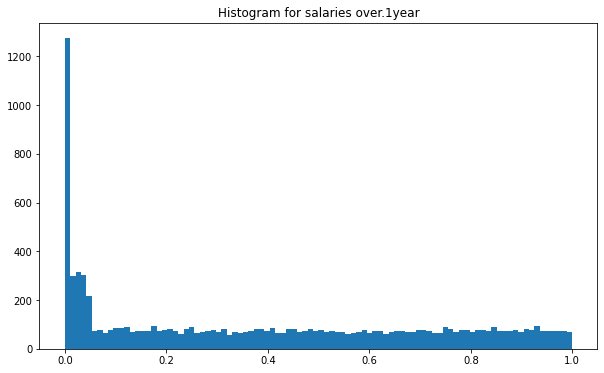

In [79]:
plt.figure(figsize=(10,6))
x = len(data_2)
binsizes = math.sqrt(x)
plt.hist(data_2, bins = int(binsizes))
plt.title('Histogram for salaries over.1year')
plt.show()

Count number of p-values that are significant at the level of 0.05

In [81]:
len(data_2)

9000

In [83]:
counter = 0
for i in data_2:
  if i < 0.05:
    counter += 1

There is 2380 p_values significant at the level of 0.05

In [84]:
counter

2380

In [85]:
p_adjusted_2 = multipletests(data_2, method='bonferroni')

In [91]:
sum(p_adjusted_2[0])

987

In [88]:
b_correction_2, acc_2 = bonferroni(data_2)

After performing Bonferroni correction 987 p_values remain

In [90]:
sum(acc_2)

987